In [1]:
import os     #使用操作系統相關功能的模塊
import numpy as np          #Python進行科學計算的基礎包
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
from keras.models import load_model
import warnings
import facerecognition as fr

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
txt = 'sample_name.txt'
target_size = 64
history = None
SaveModel = 'face.hd5'

In [3]:
fr.extractface(film=0, sample='sample0_face', number=200)

已擷取0張人臉樣本


In [4]:
fr.extractface(film=0, sample='sample1_face', number=200)

已擷取0張人臉樣本


In [5]:
fr.extractface(film=0, sample='sample2_face', number=200)

已擷取100張人臉圖片
已擷取200張人臉圖片
已擷取200張人臉樣本


In [4]:
# 寫入sample_name.txt

In [6]:
name_dict, number_of_samples=fr.getnamedict()

In [7]:
fr.train_validation_test_split()

sample0_train_validation: 160 	sample0_test: 40
sample1_train_validation: 160 	sample1_test: 40
sample2_train_validation: 160 	sample2_test: 40
sample0_train: 128 	sample0_validation: 32
sample1_train: 128 	sample1_validation: 32
sample2_train: 128 	sample2_validation: 32


# 資料預處理

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255) 
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
validation_set = validation_datagen.flow_from_directory('validation/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('test/', target_size = (target_size, target_size), batch_size = 10, class_mode = 'categorical')

Found 384 images belonging to 3 classes.
Found 96 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


# 建立模型

In [9]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

model = Sequential() # Initialising the CNN
model.add(Conv2D(32, (3, 3), input_shape = (target_size, target_size, 3), activation = 'relu')) # Convolution
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
model.add(Conv2D(32, (3, 3), activation = 'relu')) # Convolution
model.add(MaxPooling2D(pool_size = (2, 2))) # Max Pooling
model.add(Flatten()) # Flattening
model.add(Dense(units = 128, activation = 'relu')) # Fully Connected
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = number_of_samples, activation = 'softmax'))
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
__________

# 訓練模型

In [10]:
# try:
#     model.load_model('SaveModel/'+SaveModel)
#     print("載入模型成功!繼續訓練模型")
# except :    
#     print("載入模型失敗!開始訓練一個新模型")

In [11]:
# https://keras-cn.readthedocs.io/en/latest/models/model/

In [12]:
history = model.fit_generator(training_set,
                                   nb_epoch=20,
                                   nb_val_samples=30,
                                   steps_per_epoch = 30,
                                   shuffle=True,
                                   verbose = 1,
                                   validation_data = validation_set)

Epoch 1/20
30/30 [==============================] - 2s 73ms/step - loss: 1.0980 - acc: 0.3632 - val_loss: 1.0286 - val_acc: 0.3646
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.9116 - acc: 0.5764 - val_loss: 0.6965 - val_acc: 0.7187
Epoch 3/20
30/30 [==============================] - 2s 61ms/step - loss: 0.5301 - acc: 0.8035 - val_loss: 0.3777 - val_acc: 0.8750
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 0.3124 - acc: 0.8700 - val_loss: 0.1778 - val_acc: 0.9375
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1409 - acc: 0.9533 - val_loss: 0.0655 - val_acc: 1.0000
Epoch 6/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0924 - acc: 0.9600 - val_loss: 0.0640 - val_acc: 0.9792
Epoch 7/20
30/30 [==============================] - 2s 62ms/step - loss: 0.0486 - acc: 0.9867 - val_loss: 0.0168 - val_acc: 1.0000
Epoch 8/20
30/30 [==============================] - 2s 62ms/step - loss: 0.0307 - a

# 驗證曲線

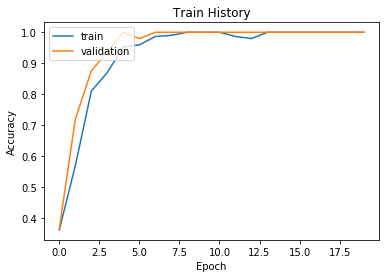

In [13]:
fr.show_acc_history(train_acc='acc',validation_acc='val_acc', history=history)

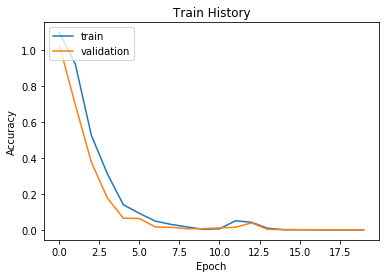

In [14]:
fr.show_loss_history(train_loss='loss',validation_loss='val_loss', history=history)

# 模型預測

In [15]:
from keras.preprocessing import image
test_image = image.load_img(r'sample1_face\sample1__0.png', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [16]:
test_image = np.expand_dims(test_image, axis = 0)
type(test_image)
test_image.shape

(1, 64, 64, 3)

In [17]:
model.predict_classes(test_image)

array([1], dtype=int64)

In [18]:
name_dict['sample'+str(model.predict_classes(test_image)[0])] 

'smile'

# 評估模型

In [19]:
testset_path = []   #testset_path為所有testset圖片路徑的list
for i in os.listdir('test'):
    for j in os.listdir('test/'+i):
        testset_path.append('test/'+i+'/'+j)  

x_test_image = []
for path in testset_path:
    x_test_image.append(image.img_to_array(image.load_img(path, target_size= (64,64))))
x_test_image = np.array(x_test_image)/225

y_test_label = test_set.classes
y_Test_OneHot = np_utils.to_categorical(y_test_label)

test = []
for x, y, z in zip(x_test_image, y_test_label, y_Test_OneHot):
    test.append([x, y, z])

x_test_image = []
y_test_label = []
y_Test_OneHot = []
for i in test:
    x_test_image.append(i[0])
    y_test_label.append(i[1])
    y_Test_OneHot.append(i[2])
x_test_image = np.array(x_test_image)
y_test_label = np.array(y_test_label)
y_Test_OneHot = np.array(y_Test_OneHot)

prediction = model.predict_classes(x_test_image)               #預測
scores = model.evaluate(x_test_image, y_Test_OneHot, verbose=0)  #評估
scores[1]

1.0

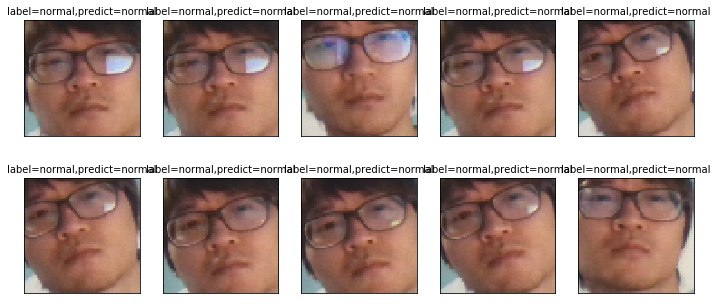

In [20]:
fr.plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10)

# 混淆矩陣

In [21]:
y_test_label_names = np.ndarray((len(y_test_label),),dtype=object)
prediction_names = np.ndarray((len(prediction),),dtype=object)
for i, j, k in zip(y_test_label, prediction, range(len(y_test_label))):
    y_test_label_names[k] = name_dict['sample'+str(i)]
    prediction_names[k] = name_dict['sample'+str(j)]

In [22]:
pd.crosstab(y_test_label_names,prediction_names,rownames=['label'],colnames=['predict'])

predict,angry,normal,smile
label,,,
angry,40,0,0
normal,0,40,0
smile,0,0,40


# 儲存模型

In [23]:
if not os.path.exists('SaveModel'):
    os.mkdir('SaveModel')
# classifier.save_weights("SaveModel/face.h5")
model.save('SaveModel/'+SaveModel)
print("Saved model to disk")

Saved model to disk


# 人臉辨識

In [24]:
fr.facerecognition()